## Final Project

By Shan Santhakumar, Kenneth Salce, John-Paul McDonald, Deepanjali Halaharivi, Shaan Pakala

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn. linear_model import LinearRegression

In [2]:
stopWords = ['and', 'at', 'the', 'yet', 'so', 'because', 'on', 'of', 'to', 'as',' in', 'his', 'her', 'she', 'him',
            'them', 'they', 'it', 'hers', 'their', 'its', 'theirs', 'with', 'said', 'for', 'after', 'will', 'that',
            'about', 'who', 'by', 'all', 'where', 'over', 'year', 'years', 'continue', 'two', 'three', 'four', 'five',
            'six', 'seven', 'eight', 'nine', 'ten', 'other', 'into']

In [3]:
f = open("good_political_words.txt")
good = f.read().split()
f.close()
f = open("bad_political_words.txt")
bad = f.read().split()
f.close()

In [4]:
def trimWord(word):
    w = word
    
    if ((w[len(w)-1] == ",")or(w[len(w)-1] == ".")or(w[len(w)-1] == "?")
        or(w[len(w)-1] == "!")or(w[len(w)-1] == "’")or(w[len(w)-1] == ":")
        or(w[len(w)-1]=="\"")or(w[len(w)-1]=="-")or(w[len(w)-1]=="'")):
        w = w[:len(w)-1]          
    elif((w[0]=="'")or(w[0]=="’")or(w[0]=="\"")or(w[0]=="-")):
        w = w[1:]          
    elif ((w[len(w)-2:len(w)] == "’s")or(w[len(w)-2:len(w)] == "\'s")):
        w = w[:len(w)-2]
    else:
        return w
    
    return(trimWord(w))

In [5]:
#returns array with count of positive headlines, negative headlines, and total headlines
def headlineTypes(fileName):
    
    f = open(fileName, encoding="utf8")
    text = f.read().split('   \n')
    f.close()
    g = 0
    b = 0
    
    #list of punctuation to remove from the beginning or end of each token
    removePunct = ["\n","\"","'",".","?","!",",","`","’","'s","’s",":"]
    
    for article in text:
        g=0
        b=0
        r = False
        d = False
        
        article_df = pd.DataFrame()
        articleArray = article.split()
        try:
            party = articleArray[len(articleArray)-1]
            r = (party == 'r')
            d = (party == 'd')
            
            if (not (r or d)):
                continue
                
            articleArray=articleArray[:len(articleArray)-1]
            
        except:
            continue
            
        #vectorize words using one-hot encoding method by taking all the words in the sentence and dropping duplicates
        article_df['word'] = articleArray
        article_df['word'] = article_df['word'].astype(str)
        
        for p in removePunct:
            article_df['word'] = article_df['word'].str.replace(p, '')
        
        article_df['word'] = article_df['word'].str.lower()
        article_length = len(article_df['word'])
        article_df['word'] = article_df['word'].drop_duplicates()
        article_df['word'] = article_df['word'].fillna('0')
        article_df = article_df[article_df['word'] != '0']
        
        for word in article_df['word']:
            #print(word)
            if (word in stopWords):
                continue
                
            if(word in good):
                g+=1
            elif(word in bad):
                b+=1
            elif(word[:len(word)-1] in good):
                g+=1
            elif(word[:len(word)-1] in bad):
                b+=1
                
        #store all the articles and number of positive and negative words they contain
        
        if (r):
            articles.loc[len(articles)] = [article, 'R', g, b, None, None]
        if (d):
            articles.loc[len(articles)] = [article, 'D', g, b, None, None]
        
    

In [6]:
cdf = pd.DataFrame()
cdf['Headline Type'] = ['Good for Democrats', 'Bad for Democrats', 'Total for Democrats', 'Good for Republicans', 
                        'Bad for Republicans', 'Total for Republicans']
cdf.set_index('Headline Type', inplace=True)

In [7]:
articles = pd.DataFrame(columns = ['Article','Party', 'Positive Words','Negative Words', 'True Sentiment','Predicted'])

In [8]:
headlineTypes('cnn.txt')

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = article_df['word'].str.replace(p, '')
/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/3298417589.py:39: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  article_df['word'] = 

In [9]:
#TRAIN_LEN = int(len(articles)*1/7)
TRAIN_LEN = 55
TEST_LEN = 30
TEST_BEGIN = TRAIN_LEN+1
TEST_END = TEST_BEGIN+TEST_LEN

### Manually filling in the True Sentiment of some articles to build regression model

In [10]:
articles['True Sentiment'][:TEST_END] = [0,-1,-1,1,1,1,0,0,1,1,0,1,-1,1,-1,-1,-1,1,0,0,1,0,-1,-1,-1,1,1,0,0,-1,-1,
                                        -1,-1,1,0,-1,0,1,-1,-1,0,-1,-1,-1,0,-1,1,1,-1,-1,-1,-1,-1,-1,0,1,0,-1,-1,-1,1,
                                        -1,-1,-1,0,-1,-1,0,0,0,-1,0,-1,-1,0,1,-1,0,0,0,-1,0,0,-1,-1,0]

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/1661054287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles['True Sentiment'][:TEST_END] = [0,-1,-1,1,1,1,0,0,1,1,0,1,-1,1,-1,-1,-1,1,0,0,1,0,-1,-1,-1,1,1,0,0,-1,-1,


### Using train_data to build linear regression model

In [11]:
train_data = articles.iloc[:TRAIN_LEN]

In [12]:
tdf_graph = articles.iloc[:TEST_END]
tdf_graph['pos-neg'] = tdf_graph['Positive Words'] - tdf_graph['Negative Words']
#tdf_graph

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/1112528744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_graph['pos-neg'] = tdf_graph['Positive Words'] - tdf_graph['Negative Words']


In [13]:
#articles.loc[81:100]

### These graphs show us the relationship between sentiment and positive and negative words is not that linear on their own, but when graphing the difference, it does appear there could be a linear sort of pattern
    looks like the positive words may not affect the sentiment as much as the negative words, so the value of the  positive word weight will be less than the negative word weight in the linear regression model

Text(0.5, 1.0, 'Number of Negative Political Words in the Article vs True Sentiment')

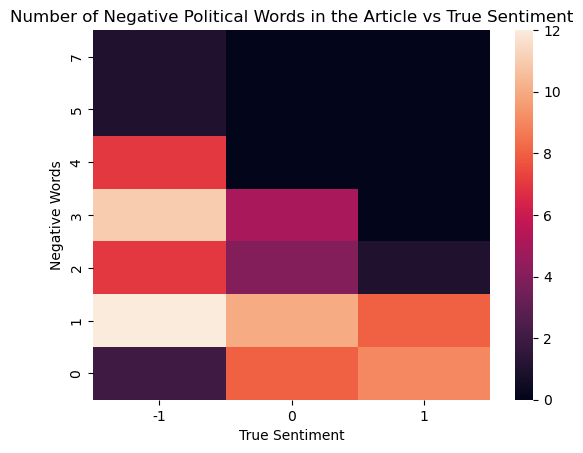

In [14]:
heat_df = pd.crosstab(tdf_graph['Negative Words'], tdf_graph['True Sentiment'])
heat_df = heat_df.iloc[::-1]
fire1 = sns.heatmap(heat_df)
fire1.set_title('Number of Negative Political Words in the Article vs True Sentiment')

Text(0.5, 1.0, 'Number of Positive Political Words in the Article vs True Sentiment')

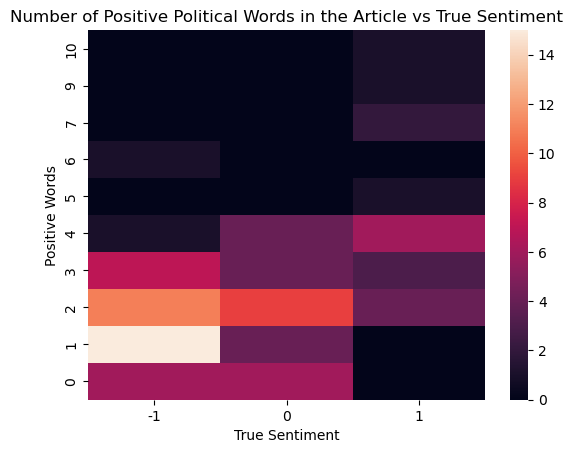

In [15]:
heat_df = pd.crosstab(tdf_graph['Positive Words'], tdf_graph['True Sentiment'])
heat_df = heat_df.iloc[::-1]
fire2 = sns.heatmap(heat_df)
fire2.set_title('Number of Positive Political Words in the Article vs True Sentiment')

Text(50.722222222222214, 0.5, 'Difference in Positive and Negative Words')

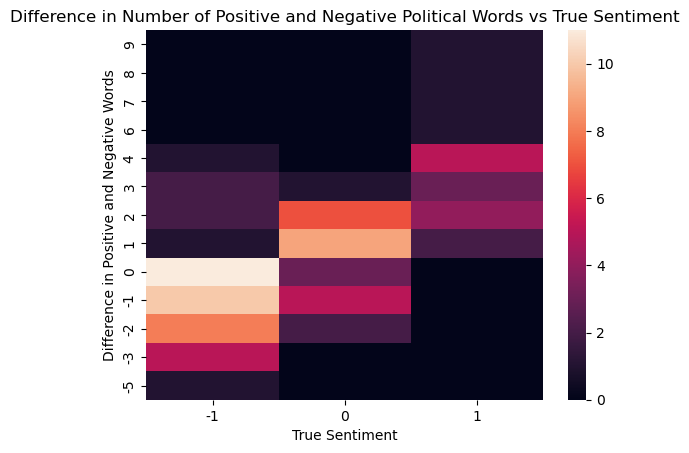

In [16]:
heat_df = pd.crosstab(tdf_graph['Positive Words'] - tdf_graph['Negative Words'], tdf_graph['True Sentiment'])
heat_df = heat_df.iloc[::-1]
fire3 = sns.heatmap(heat_df)
fire3.set_title('Difference in Number of Positive and Negative Political Words vs True Sentiment')
fire3.set_ylabel("Difference in Positive and Negative Words")

### Adjust the thresholds that make the program consider the article positive, neutral, or negative

In [17]:
positiveThreshold = 0.3
negativeThreshold = -0.2

In [18]:
from sklearn import linear_model
log_model = linear_model.LinearRegression()
log_model.fit(X = train_data[['Positive Words', 'Negative Words']], y = train_data['True Sentiment'])

LinearRegression()

In [19]:
print("Coefficients [positive words, negative words]: ", log_model.coef_)
print("Intercept: ", log_model.intercept_)

Coefficients [positive words, negative words]:  [ 0.19108988 -0.31017066]
Intercept:  -0.168435527661225


In [20]:
for i in range(0,len(articles)):
    pos = articles.iloc[i]['Positive Words']
    neg = articles.iloc[i]['Negative Words']
    prediction = log_model.predict([[pos,neg]])[0]
    
    if (prediction > positiveThreshold):
        prediction = 1
    elif (prediction < negativeThreshold):
        prediction = -1
    else:
        prediction = 0
        
    articles.at[i,'Predicted'] = prediction

/Users/shaanpakala/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shaanpakala/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shaanpakala/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shaanpakala/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shaanpakala/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/shaanpak

In [21]:
test_data = articles.iloc[TEST_BEGIN:TEST_END]

### Using test_data to evaluate model accuracy

In [22]:
test_data['Correct'] = test_data['True Sentiment'] == test_data['Predicted']

/var/folders/w0/9yd65psx4r3fj8bj1936wsn00000gn/T/ipykernel_81487/214123194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Correct'] = test_data['True Sentiment'] == test_data['Predicted']


In [23]:
#test_data

In [24]:
percentCorrect = len(test_data[test_data['Correct']])/len(test_data['Correct'])

In [25]:
print("Our model got", str(int(percentCorrect*100)) + "% of the predictions correct.")

Our model got 73% of the predictions correct.


In [26]:
republicanArticles = articles[articles['Party']=='R']
democratArticles = articles[articles['Party']=='D']

positiveRArticles = len(republicanArticles[republicanArticles['Predicted'] == 1])
positiveDArticles = len(democratArticles[democratArticles['Predicted'] == 1])
negativeRArticles = len(republicanArticles[republicanArticles['Predicted'] == -1])
negativeDArticles = len(democratArticles[democratArticles['Predicted'] == -1])

#print(republicanArticles, democratArticles)

cdf['Count'] = [positiveDArticles, negativeDArticles, len(democratArticles), positiveRArticles, negativeRArticles, len(republicanArticles)]

In [27]:
cdf

,Count
Headline Type,
Good for Democrats,44
Bad for Democrats,86
Total for Democrats,212
Good for Republicans,36
Bad for Republicans,117
Total for Republicans,246


### Make Visualization for Data

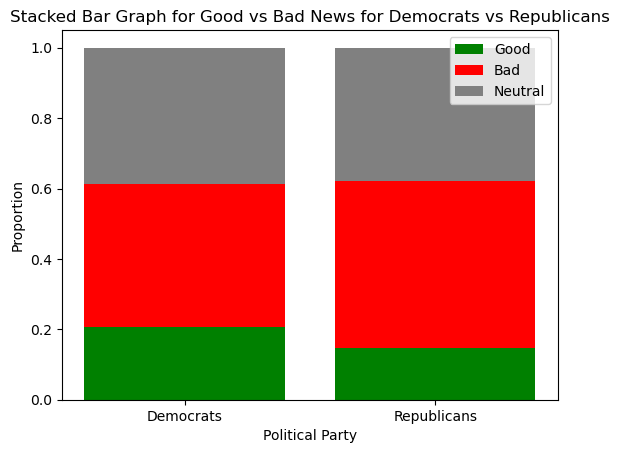

In [28]:
# make bar graph for senitment analysis

# Data
democrats_good = cdf['Count'][0]
democrats_bad = cdf['Count'][1]
democrats_total = cdf['Count'][2]

republicans_good = cdf['Count'][3]
republicans_bad = cdf['Count'][4]
republicans_total = cdf['Count'][5]

# Calculate proportions
democrats_proportion_good = democrats_good / democrats_total
democrats_proportion_bad = democrats_bad / democrats_total
democrats_proportion_neutral = 1 - (democrats_proportion_good + democrats_proportion_bad)

republicans_proportion_good = republicans_good / republicans_total
republicans_proportion_bad = republicans_bad / republicans_total
republicans_proportion_neutral = 1 - (republicans_proportion_good + republicans_proportion_bad)

# Create stacked bar graph
categories = ['Democrats', 'Republicans']

# Plot bars
plot.bar(categories, [democrats_proportion_good, republicans_proportion_good], label='Good', color='green')
plot.bar(categories, [democrats_proportion_bad, republicans_proportion_bad], bottom=[democrats_proportion_good, republicans_proportion_good], label='Bad', color='red')
plot.bar(categories, [democrats_proportion_neutral, republicans_proportion_neutral], bottom=[democrats_proportion_good + democrats_proportion_bad, republicans_proportion_good + republicans_proportion_bad], label='Neutral', color='gray')

plot.xlabel('Political Party')
plot.ylabel('Proportion')
plot.title('Stacked Bar Graph for Good vs Bad News for Democrats vs Republicans')
plot.legend()
plot.show()

From the above stacked bar chart we can see that most news for Democrats and Republicans in CNN is more negative, with Republicans having a slightly higher proportion of negative news. The next most common type of news for both parties is neutral, and the least frequent type of news is positive news. 